In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
!pip install ultralytics
from ultralytics import YOLO



converting image to jpg

In [ ]:
from PIL import Image
import glob
import os
from google.colab import drive

# Mount your Google Drive (if not already done)

# Specify image_folder_path: the path to the folder containing your images in Drive
image_folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data'

# Specify new_folder_path: the path to the new folder where you want to save the converted images
new_folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/jpeg format'

# Create the new folder if it doesn't exist
os.makedirs(new_folder_path, exist_ok=True)

# List all image files in the folder
image_paths = glob.glob(os.path.join(image_folder_path, "*"))

for image_path in image_paths:
    # Check if it's an image file
    if not os.path.isfile(image_path):
        continue

    # Extract filename and create output path
    filename = os.path.basename(image_path)
    output_path = os.path.join(new_folder_path, os.path.splitext(filename)[0] + ".jpg")

    # Open the image and convert to RGB
    img = Image.open(image_path)
    img_rgb = img.convert("RGB")

    # Save the converted image as JPEG
    img_rgb.save(output_path, "JPEG")

print(f"Successfully converted images in {image_folder_path} and saved them to {new_folder_path}")


Successfully converted images in /content/drive/MyDrive/FINAL_YEAR_PROJECT/website data and saved them to /content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/jpeg format


predicting through yolo

In [ ]:
import os
import glob
from google.colab import drive
from ultralytics import YOLO  # Use the correct import for your YOLO library



# Specify paths:
image_folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/jpeg format'  # Folder containing images
#new_folder_path = '/content/drive/MyDrive/output_folder'     # Folder to save results (optional)
model_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/model/best.pt'         # Path to your YOLO model

# Create output folder if needed
#os.makedirs(new_folder_path, exist_ok=True)

# Load YOLO model
model = YOLO(model_path)

# List image files (adjust extensions as needed)
image_paths = glob.glob(os.path.join(image_folder_path, "*"))

# Process each image
for image_path in image_paths:
    # Skip non-image files
    if not os.path.isfile(image_path):
        continue

    # Get filename for better output labeling
    filename = os.path.basename(image_path)

    # Perform prediction directly
    results = model.predict(image_path,conf=0.25, save_txt=True,save_crop=True, save= True )

    # Customize result handling:
    print(f"Finished processing: {filename}")
   # print(f"Predictions: {results.xyxy[0]}")  # Example: print bounding boxes and classes

    # Optionally save results (modify format and locations):
   # output_filename = os.path.join(new_folder_path, f"{filename}_results.txt")
    # with open(output_filename, "w") as f:
    #     # Customize how you want to save or use predictions (e.g., bounding boxes, scores)
    #     f.write(str(results.xyxy[0]))  # Example: save all detections in JSON-like format

print("All images processed!")



image 1/1 /content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/jpeg format/img_9_out.jpg: 640x448 1 Tshirt, 3647.7ms
Speed: 30.3ms preprocess, 3647.7ms inference, 27.7ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
Finished processing: img_9_out.jpg

image 1/1 /content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/jpeg format/img_8_out.jpg: 640x448 1 Tshirt, 2222.1ms
Speed: 3.6ms preprocess, 2222.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels
Finished processing: img_8_out.jpg

image 1/1 /content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/jpeg format/img_7_out.jpg: 640x448 1 Tshirt, 2174.7ms
Speed: 4.6ms preprocess, 2174.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels
Finished processing: img_7

In [ ]:
import shutil

# Run YOLOv8 prediction and save cropped images
results = model.predict(image_path, conf=0.25, save_txt=True, save_crop=True, save=True)

# Define paths
temp_folder_path = '/content/runs/detect/predict/crops'  # Path to the temporary folder where cropped images are saved
drive_folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images'  # Path to the desired folder in Google Drive

# Move files from the temporary folder to the desired folder in Google Drive
for filename in os.listdir(temp_folder_path):
    src = os.path.join(temp_folder_path, filename)
    dst = os.path.join(drive_folder_path, filename)
    shutil.move(src, dst)



image 1/1 /content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/jpeg format/polka_2.jpg: 640x480 1 Tshirt, 2449.8ms
Speed: 6.2ms preprocess, 2449.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
38 labels saved to runs/detect/predict/labels


In [5]:
!yolo task=detect mode=predict model=../content/drive/MyDrive/FINAL_YEAR_PROJECT/model/best.pt conf=0.25 source=../content/drive/MyDrive/FINAL_YEAR_PROJECT/images_for_testing/extra.jpg save_txt=True save_crop=True save= True

Ultralytics YOLOv8.1.17 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/../content/drive/MyDrive/FINAL_YEAR_PROJECT/images_for_testing/extra.jpg: 640x640 1 Tshirt, 3006.8ms
Speed: 4.6ms preprocess, 3006.8ms inference, 12.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from PIL import Image
import glob
import os

image_folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data'

# List all image files in the folder
image_paths = glob.glob(os.path.join(image_folder_path, "*.jpg")) + \
             glob.glob(os.path.join(image_folder_path, "*.png")) + \
             glob.glob(os.path.join(image_folder_path, "*.jpeg"))+\
             glob.glob(os.path.join(image_folder_path, "*.webp"))
image_paths

['/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_1_out.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_2_out.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_3_out.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_4_out.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_5_out.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_6_out.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_1_elo.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_2_elo.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_3_elo.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_4_elo.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_5_elo.webp',
 '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/img_6_elo.webp']

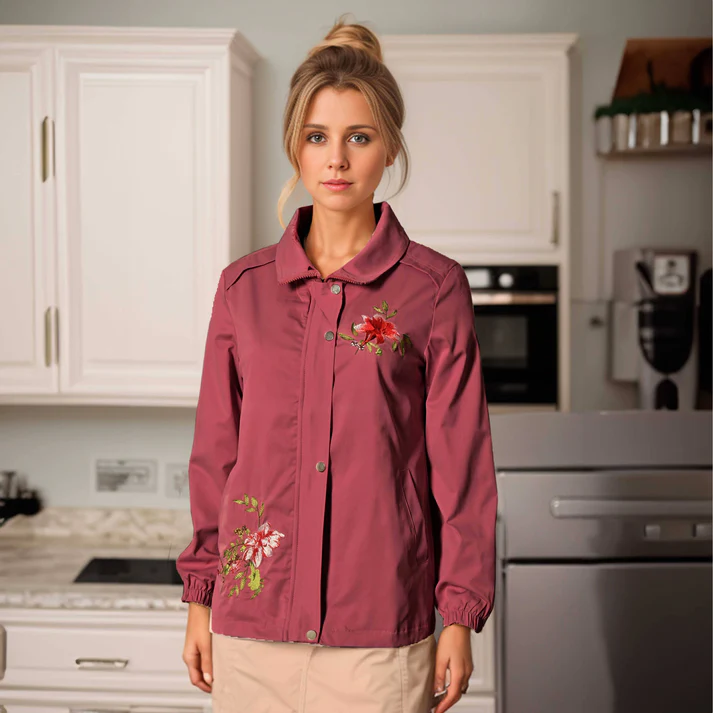

In [ ]:

# Load each image and apply your prediction logic
for image_path in image_paths[:]:

    img = Image.open(image_path)
    img=img.convert("RGB")
img
!yolo task=detect mode=predict model=../content/drive/MyDrive/FINAL_YEAR_PROJECT/model/best.pt conf=0.25 source=img save_txt=True #save=True

In [ ]:
!yolo task=detect mode=predict model=../content/drive/MyDrive/FINAL_YEAR_PROJECT/model/best.pt conf=0.25 source=img save_txt=True #save=True

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 568, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 406, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 213, in predict_cli
    for _ in gen:  # noqa, running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(Non

In [ ]:
from ultralytics import YOLO  # Import if needed

# ... (rest of your code to load the image)

img = Image.open(image_path)
img = img.convert("RGB")

# Use YOLO with the correct source and output paths
model = YOLO("/content/drive/MyDrive/FINAL_YEAR_PROJECT/model/best.pt")
results = model.predict(path=image_path, save_txt=True, save_dir="path/to/save/output")

# Access results or print detections as needed
print(results.xyxy[0])  # Print bounding boxes and class names


In [ ]:
from PIL import Image
import glob
import os
import tempfile
from ultralytics import YOLO  # Import YOLO

# Specify path to your image folder
image_folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data'

# List all image files, including WEBP (adjust extensions as needed)
image_paths = glob.glob(os.path.join(image_folder_path, "*"))

# Define function to handle WEBP conversion and prediction
def process_image(image_path):
    if image_path.endswith(".webp"):
        # Convert WEBP to JPEG in memory
        with Image.open(image_path) as img:
            img_rgb = img.convert("RGB")
        with tempfile.NamedTemporaryFile() as tmp_file:
            img_rgb.save(tmp_file, "JPEG")
            with open(tmp_file.name, 'rb') as f:
                jpeg_data = f.read()
        # Use JPEG data for prediction
        results = model.predict(data=jpeg_data, conf=0.25, save_txt=True, save_dir=output_dir)
    else:
        # Load other image formats directly
        img = Image.open(image_path)
        img_rgb = img.convert("RGB")
        results = model.predict(img=img_rgb, conf=0.25, save_txt=True, save_dir=output_dir)
    return results

# Configure YOLO model
model = YOLO("/content/drive/MyDrive/FINAL_YEAR_PROJECT/model/best.pt")

# Set up output directory (optional)
output_dir = os.path.join(image_folder_path, "output")
os.makedirs(output_dir, exist_ok=True)

# Process each image
for image_path in image_paths:
    results = process_image(image_path)
    print((results))
    print(f"Finished processing: {image_path}")
    #print(f"Predictions: {results.xyxy[0]}")  # Print bounding boxes and class names

print("All images processed!")


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 47.9ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 29.8ms
Speed: 2.8ms preprocess, 38.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5
0 label saved to runs/detect/predict5/labels
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Tshirt', 1: 'hoodie', 2: 'knit', 3: 'shirts'}
obb: None
orig_img: array([[[119, 146, 172],
        [121, 148, 174],
        [122, 152, 177],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[120, 147, 173],
        [122, 149, 175],
        [123, 153, 178],
        ...,
        [161, 171, 188

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/FINAL_YEAR_PROJECT/website data/output'

# New Section